In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
tdata = pd.read_csv('/content/titanic_dataset .csv')

In [3]:
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tdata.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
tdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
tdata.shape

(891, 12)

# 2. Do all the necessary pre-processing steps

In [8]:
tdata.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#     Checking if any data is duplicated
tdata[tdata.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


No duplicates found

In [10]:
#       Survived is the target column
tdata.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Inference:
1. 'Survived' is the target column/variable.

2. 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.

3. 'Age' and 'Embarked' has less number of missing values. We have to fill them.

4. As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.

5. 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' doesn't have any missing values.

### Handling missing values




*   Among 891 columns, 687 Cabin values(more than 50%) are missing, so concluding we can drop the column
*   Deleting the unused columns 'PassengerId','Name' and 'Ticket' as well.






In [11]:
tdata.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)
tdata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S



*   Filling all the missing values in the Embarked column - the column has 2 missing values and filling it with most occuring 'Embarked' value that is mode.





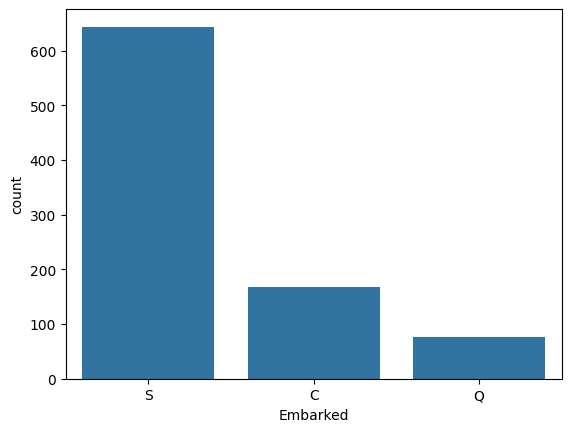

In [12]:
# Visualization of Embarked column
sns.countplot(x='Embarked', data=tdata)
plt.show()

In [13]:
#    finding the value which is most occuring in the Embarked
emb_mode = tdata.Embarked.mode()[0]
emb_mode

'S'

In [14]:
tdata['Embarked'] = tdata['Embarked'].fillna(emb_mode)

*   Change the categoric column 'Embarked' to numeric

In [15]:
#   replacing the categorical values with numeric values
tdata['Embarked'] = tdata['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})



*   Ploting the histogram for 'Age' field.

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

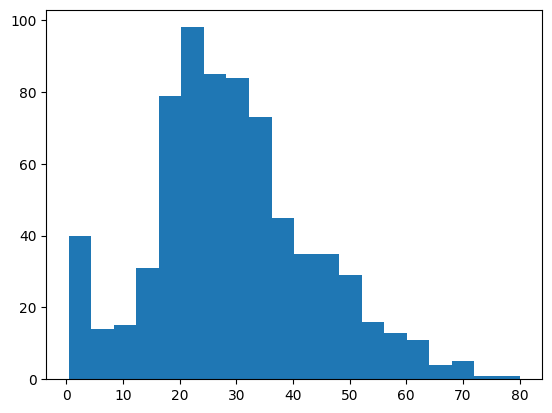

In [16]:
plt.hist(tdata['Age'], bins=20)



*   It seems like a normal distiribution. So using the ‘fillna’ method for imputing the column 'Age' with the median value. (The median is the middlemost value)



In [17]:
tdata['Age']= tdata['Age'].fillna(tdata['Age'].median())

*   Using the ‘fillna’ method for imputing the column 'Fare' with the median value.

In [18]:
tdata['Fare']= tdata['Fare'].fillna(tdata['Fare'].median())



*   Change the categoric column 'Sex' to numeric



In [19]:
tdata['Sex'] = tdata['Sex'].replace({'male': 0, 'female': 1})

In [20]:
tdata.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
tdata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### Handling Outliers

### 1. Column 'Age'

<Axes: xlabel='Age'>

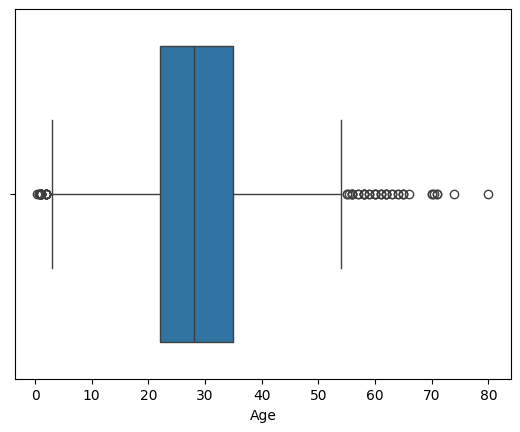

In [22]:
sns.boxplot(x=tdata['Age'],data=tdata)

In [23]:
tdata['Age'].skew()

0.5102446555756495

The range of skewness is:

*   -0.5 to 0.5: Normally skewed distribution
*   -0.5 to -1: Negatively skewed distribution
*   0.5 to 1: Positively skewed distribution

This is a positively skewed distribution as this skew value indicate the presence of outliers

So we are adopting the 'Interquartile range (IQR) method' for handling outliers












In [24]:
#    calculating the interquartile range value of the ‘Age’ variable
Q1=tdata['Age'].quantile(0.25)
Q3=tdata['Age'].quantile(0.75)
IQR=Q3-Q1
IQR

13.0

In [25]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("Lower value: ",low_lim)
print("Upper value: ",up_lim)

Lower value:  2.5
Upper value:  54.5


In [26]:
outliers =[]
for x in tdata['Age']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [27]:
tdata['Age'] = tdata['Age'].clip(lower=low_lim ,upper=up_lim)

In [28]:
outliers =[]
for x in tdata['Age']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[]


<Axes: xlabel='Age'>

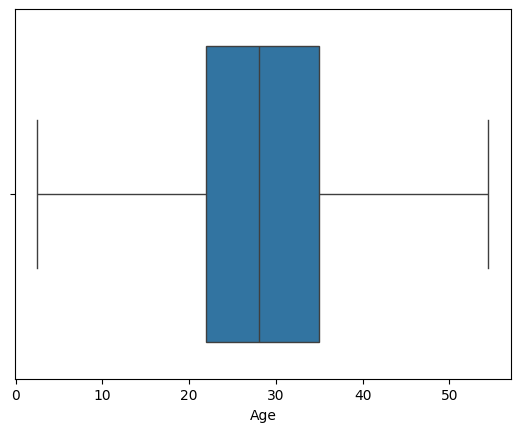

In [29]:
sns.boxplot(x=tdata['Age'],data=tdata)

<Axes: >

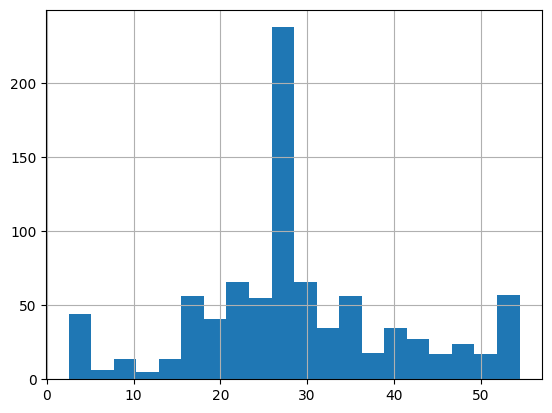

In [30]:
tdata['Age'].hist(bins=20)

## Inference :
### Now the distribution looks much closer to a normal distribution and effect of extreme values has been significantly subsided.

### 2. Column 'Fare'

<Axes: xlabel='Fare'>

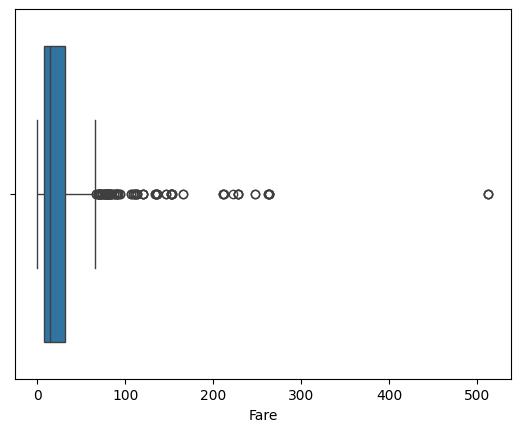

In [31]:
sns.boxplot(x=tdata['Fare'],data=tdata)

In [32]:
tdata['Fare'].skew()

4.787316519674893

The range of skewness is:

*   -0.5 to 0.5: Normally skewed distribution
*   -0.5 to -1: Negatively skewed distribution
*   0.5 to 1: Positively skewed distribution

This is a positively skewed distribution as this skew value indicate the presence of outliers

So we are adopting the 'Interquartile range (IQR) method' for handling outliers

In [33]:
#    calculating the interquartile range value of the ‘Age’ variable
Q1=tdata['Fare'].quantile(0.25)
Q3=tdata['Fare'].quantile(0.75)
IQR=Q3-Q1
IQR

23.0896

In [34]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("Lower value: ",low_lim)
print("Upper value: ",up_lim)

Lower value:  -26.724
Upper value:  65.6344


In [35]:
outliers =[]
for x in tdata['Fare']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [36]:
tdata['Fare'] = tdata['Fare'].clip(lower=low_lim ,upper=up_lim)

In [37]:
outliers =[]
for x in tdata['Fare']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[]


<Axes: xlabel='Fare'>

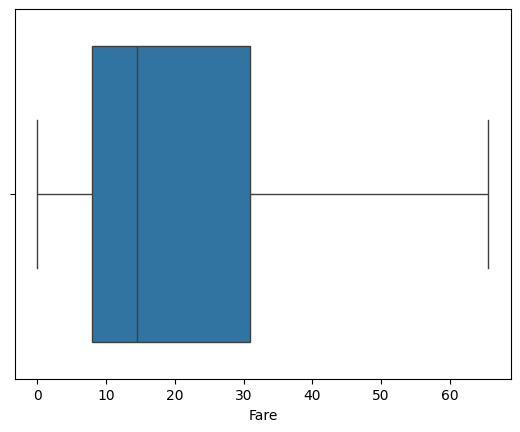

In [38]:
sns.boxplot(x=tdata['Fare'],data=tdata)

### Inference :
### Here the effect of extreme values has been significantly subsided in column 'Fare'.

## Correlation

In [39]:
# display the correlation matrix
tdata.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.060622,-0.035322,0.081629,0.317430,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.340404,0.083081,0.018443,-0.715300,0.045702
Sex,0.543351,-0.131900,1.000000,-0.074740,0.114631,0.245489,0.234969,0.116569
Age,-0.060622,-0.340404,-0.074740,1.000000,-0.239601,-0.178959,0.144544,-0.011955
SibSp,-0.035322,0.083081,0.114631,-0.239601,1.000000,0.414838,0.332021,-0.059961
Parch,0.081629,0.018443,0.245489,-0.178959,0.414838,1.000000,0.292616,-0.078665
Fare,0.317430,-0.715300,0.234969,0.144544,0.332021,0.292616,1.000000,0.010739
Embarked,0.106811,0.045702,0.116569,-0.011955,-0.059961,-0.078665,0.010739,1.000000


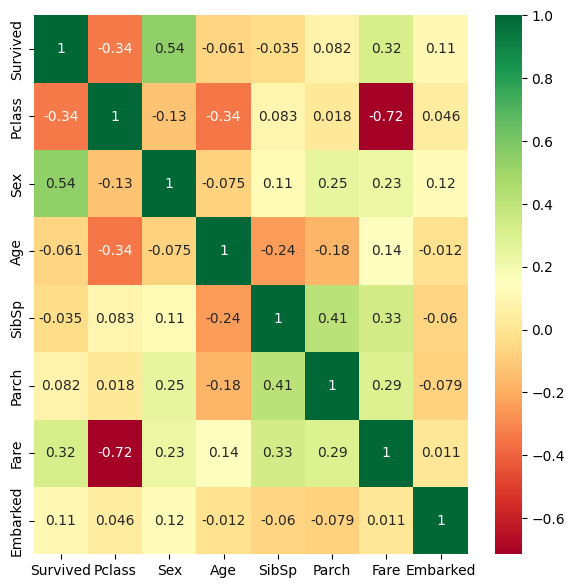

In [40]:
#  Creating a heatmap to visualize the correlation matrix of DataFrame iris
plt.figure(figsize=(7,7))
sns.heatmap(tdata.corr(), annot=True, cmap="RdYlGn");
plt.show()

Inference :

There is no significant correlation between any of the columns



## Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
# transform the string labels to integer
tdata['Sex'] = lab_enc.fit_transform(tdata['Sex'])
tdata['Embarked'] = lab_enc.fit_transform(tdata['Embarked'])
tdata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,65.6344,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Scaling

In [42]:
tdata.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.039282,0.523008,0.381594,24.046813,0.361392
std,0.486592,0.836071,0.477990,12.072074,1.102743,0.806057,20.481625,0.635673
min,0.000000,1.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,54.500000,8.000000,6.000000,65.634400,2.000000


In [43]:
# Importing libraries for Train-test split
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = tdata.drop('Survived', axis=1)
y = tdata['Survived']

In [44]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,65.6344,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,28.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [45]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((668, 7), (668,), (223, 7), (223,))

In [47]:
# importing libraries for Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 3. Create kNN and SVM models

## K-Nearest Neighbors

In [48]:
# Importing Confusion Matrix Libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
# Importing KNeighborsClassifier Libraries
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [50]:
#  Trying the KNeighborsClassifier
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  knn.fit(X_train_scaled,y_train)
  # Predicting
  y_knn_pred=knn.predict(X_test_scaled)
  knn_acc=accuracy_score(y_test,y_knn_pred)
  metric_k.append(knn_acc)

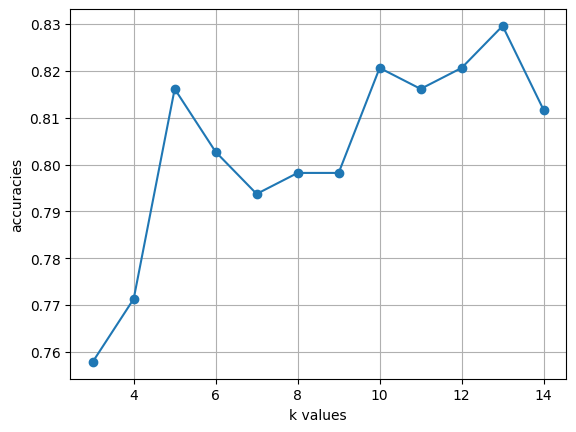

In [51]:
#   Plotting the graph to find out the highest kNN accuracy
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

### From this graph we can identify k value=13 is giving highest accuracy
### So we can create a model with k=13

In [52]:
knn = KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=2)
knn.fit(X_train_scaled,y_train)
# Predicting
y_knn_pred=knn.predict(X_test_scaled)

In [53]:
confusion_matrix(y_test,y_knn_pred)

array([[120,  14],
       [ 24,  65]])

In [54]:
print('Accuracy score for model kNN is :', accuracy_score(y_test, y_knn_pred))

Accuracy score for model kNN is : 0.8295964125560538


## SVM

In [55]:
# Importing Support Vector Classifier Libraries
from sklearn.svm import SVC

In [56]:
#  Trying the Support Vector Classifier
svc = SVC(kernel = 'linear')
svc.fit(X_train_scaled, y_train)
# Predicting
y_svc_pred = svc.predict(X_test_scaled)

In [57]:
confusion_matrix(y_test, y_svc_pred)

array([[112,  22],
       [ 26,  63]])

In [58]:
print('Accuracy score for model SVM is :', accuracy_score(y_test, y_svc_pred))

Accuracy score for model SVM is : 0.7847533632286996


# 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

### Cross Validation of kNN - Using KFold Method

In [59]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
kfold_scores1 = cross_val_score(knn, X, y, cv = k_folds)

In [60]:
print ('KFold Cross Validation')
print("Cross Validation Scores: ", kfold_scores1)
print("Average CV Score: ", kfold_scores1.mean())
print("Number of CV Scores used in Average: ", len(kfold_scores1))

KFold Cross Validation
Cross Validation Scores:  [0.64804469 0.68539326 0.73595506 0.7247191  0.74719101]
Average CV Score:  0.7082606239407445
Number of CV Scores used in Average:  5


### Cross Validation of kNN - Using StratifiedKFold Method

In [61]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
sk_folds = StratifiedKFold(n_splits = 5)
skfold_scores1 = cross_val_score(knn, X, y, cv = sk_folds)

In [62]:
print ('Stratified Cross Validation')
print("Cross Validation Scores: ", skfold_scores1)
print("Average CV Score: ", skfold_scores1.mean())
print("Number of CV Scores used in Average: ", len(skfold_scores1))

Stratified Cross Validation
Cross Validation Scores:  [0.63128492 0.70224719 0.73595506 0.76966292 0.7247191 ]
Average CV Score:  0.7127738371728077
Number of CV Scores used in Average:  5


### Cross Validation of SVC - Using KFold Method

In [63]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
kfold_scores2 = cross_val_score(svc, X, y, cv = k_folds)

In [64]:
print ('KFold Cross Validation')
print("Cross Validation Scores: ", kfold_scores2)
print("Average CV Score: ", kfold_scores2.mean())
print("Number of CV Scores used in Average: ", len(kfold_scores2))

KFold Cross Validation
Cross Validation Scores:  [0.81564246 0.79775281 0.78089888 0.73595506 0.80337079]
Average CV Score:  0.7867239972380893
Number of CV Scores used in Average:  5


### Cross Validation of SVC - Using StratifiedKFold Method

In [65]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
sk_folds = StratifiedKFold(n_splits = 5)
skfold_scores2 = cross_val_score(svc, X, y, cv = sk_folds)

In [66]:
print ('Stratified Cross Validation')
print("Cross Validation Scores: ", skfold_scores2)
print("Average CV Score: ", skfold_scores2.mean())
print("Number of CV Scores used in Average: ", len(skfold_scores2))

Stratified Cross Validation
Cross Validation Scores:  [0.80446927 0.80898876 0.78651685 0.75280899 0.78651685]
Average CV Score:  0.7878601468834348
Number of CV Scores used in Average:  5


### Consolidating the average accuracy score of the models

In [67]:
print("kNN - KFold Average CV Score           : ", kfold_scores1.mean())
print("kNN - Stratified KFold Average CV Score: ", skfold_scores1.mean())
print("SVC - KFold Average CV Score           : ", kfold_scores2.mean())
print("SVC - Stratified KFold Average CV Score: ", skfold_scores2.mean())

kNN - KFold Average CV Score           :  0.7082606239407445
kNN - Stratified KFold Average CV Score:  0.7127738371728077
SVC - KFold Average CV Score           :  0.7867239972380893
SVC - Stratified KFold Average CV Score:  0.7878601468834348


In [68]:
print('Accuracy score for model kNN is :', accuracy_score(y_test, y_knn_pred))
print('Accuracy score for model SVM is :', accuracy_score(y_test, y_svc_pred))

Accuracy score for model kNN is : 0.8295964125560538
Accuracy score for model SVM is : 0.7847533632286996


# Inference :


## 1. After Cross Validation, found better accuracy for *Stratified K-Fold cross validation* for model *SVC*. That is *0.7879*.

## 2. Found better accuracy for *KNN model* with out cross validation. That is *0.8296*.




